In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Reading SOFUE DATA

In [2]:
# Source Data from Sofue (_) https://academic.oup.com/pasj/article/65/6/118/1455164?login=false
df = pd.read_csv('DATA_SOFUE_2009.csv')
df

,Radius,Velocity,Velo.dispersion
0,0.29,241.68,17.15
1,0.52,242.67,11.06
2,0.82,226.67,12.34
3,1.10,214.93,6.44
4,1.30,210.32,7.12
...,...,...,...
108,353.29,82.83,83.95
109,647.55,105.77,96.74
110,817.71,118.92,80.17
111,1012.54,126.69,98.22


In [3]:
# Change radius value R = 0.52 into R = 0.525 by approximately closed and R > a_b
df['Radius'][1]=0.525
df

,Radius,Velocity,Velo.dispersion
0,0.290,241.68,17.15
1,0.525,242.67,11.06
2,0.820,226.67,12.34
3,1.100,214.93,6.44
4,1.300,210.32,7.12
...,...,...,...
108,353.290,82.83,83.95
109,647.550,105.77,96.74
110,817.710,118.92,80.17
111,1012.540,126.69,98.22


## Calculating Bulge Velocity

\begin{equation}
κ = 7.6695, \quad a_b = 522\:\mathrm{pc}, \quad M_b = (1.655±0.083)×10^{10} M_⊙,\\\
\quad G = 4.3009×10^{-3} \: \left(\frac{\mathrm{pc}}{M_⊙}\right)\; (\mathrm{km/s})^{2} \\
x = \frac{R}{a_b} \\
𝔅(x) = \left(\frac{1}{x} \int_{0}^{x}y^{2}\int_{y}^{\infty}\frac{\frac{d}{dx}\exp{[-κ(x^{\frac{1}{4}}-1)]}}{\sqrt{x^2-1}}\,dx\,dy \right)^{\frac{1}{2}}  \\
𝔅(x) = \left(\frac{1}{x} \int_{0}^{x}y^{2}\int_{y}^{\infty}-\frac{κ\exp{[-κ(x^{\frac{1}{4}}-1)]}}{4x^{\frac{3}{4}}\sqrt{x^2-1}}\,dx\,dy \right)^{\frac{1}{2}}  \\
V_{b}(R) = \sqrt{\frac{G M_b}{a_{b}}} \, 𝔅(x)
\end{equation}



In [4]:
import numpy as np
from scipy.integrate import quad

kappa = 7.6695
a_b = 522 # pc
Mb = 1.652*10**(10) # Msun
G = 4.3009*10**(-3) # dalam satuan (pc/MSun) * (km/s)^2

def Vbulge(R):
    x = R / a_b
    B = np.sqrt(1 / x * quad(lambda y, x: y**2 * quad(lambda dx: -kappa*(np.exp(-kappa*((x)**0.25 - 1))) / (4*(x)**0.75*np.sqrt((x)** 2 - 1)), x, np.inf, epsabs=1e-50, epsrel=1e-50, limit=100000)[0], 0, x, args=(x,), epsabs=1e-50, epsrel=1e-50, limit=1000)[0])
    return np.sqrt(G * Mb / a_b) * B

df['Vbulge'] = np.vectorize(Vbulge)(df['Radius'].values*1000)
df

C:\Users\muham\AppData\Local\Temp\ipykernel_2116\1807867503.py:11: RuntimeWarning: invalid value encountered in sqrt
  B = np.sqrt(1 / x * quad(lambda y, x: y**2 * quad(lambda dx: -kappa*(np.exp(-kappa*((x)**0.25 - 1))) / (4*(x)**0.75*np.sqrt((x)** 2 - 1)), x, np.inf, epsabs=1e-50, epsrel=1e-50, limit=100000)[0], 0, x, args=(x,), epsabs=1e-50, epsrel=1e-50, limit=1000)[0])
C:\Users\muham\AppData\Local\Temp\ipykernel_2116\1807867503.py:11: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  B = np.sqrt(1 / x * quad(lambda y, x: y**2 * quad(lambda dx: -kappa*(np.exp(-kappa*((x)**0.25 - 1))) / (4*(x)**0.75*np.sqrt((x)** 2 - 1)), x, np.inf, epsabs=1e-50, epsrel=1e-50, limit=100000)[0], 0, x, args=(x,), epsabs=1e-50, epsrel=1e-50, limit=1000)[0])
C:\Users\muham\AppData\Local\Temp\ipykernel_2116\1807867503.py:11: IntegrationWarning: The integral is probably divergent, or slowly

,Radius,Velocity,Velo.dispersion,Vbulge
0,0.290,241.68,17.15,NaN
1,0.525,242.67,11.06,8.984180e+02
2,0.820,226.67,12.34,2.247026e+02
3,1.100,214.93,6.44,1.573117e+02
4,1.300,210.32,7.12,1.293131e+02
...,...,...,...,...
108,353.290,82.83,83.95,9.873821e-05
109,647.550,105.77,96.74,4.346066e-06
110,817.710,118.92,80.17,1.140560e-06
111,1012.540,126.69,98.22,3.116850e-07


## Calculating Disk Velocity
\begin{equation}
a_d = 3.19\;\text{kpc},\
M_d = (3.41±0.41)\times 10^{10}M_\odot,
\quad G = 4.3009×10^{-3} \: \left(\frac{\mathrm{pc}}{M_⊙}\right)\; (\mathrm{km/s})^{2} \\
x = \frac{R}{a_d}\\
𝔇(x) = \frac{x}{\sqrt{2}}\sqrt{I_0\left(\frac{X}{2}\right)K_0\left(\frac{X}{2}\right)-I_1\left(\frac{X}{2}\right)K_1\left(\frac{X}{2}\right)}\\
V_{d}(R) = \sqrt{\frac{G\,M_d}{a_d}}\,𝔇(x)
\end{equation}







In [5]:
# Galaxy Disk
from scipy.special import iv, kv

# konstanta
a_d = 3.19*10**(3) # pc
Md = 3.41*10**(10) # Msun

def Vdisk(R):
  x = R/a_d
  I0 = iv(0, x/2)
  K0 = kv(0, x/2)
  I1 = iv(1, x/2)
  K1 = kv(1, x/2)
  A = I0*K0 - I1*K1
  D = x * np.sqrt(A/2)
  return np.sqrt(G*Md/a_d) * D


df['Vdiskk'] = Vdisk(df['Radius']*1000)
df

,Radius,Velocity,Velo.dispersion,Vbulge,Vdiskk
0,0.290,241.68,17.15,NaN,22.701056
1,0.525,242.67,11.06,8.984180e+02,36.407407
2,0.820,226.67,12.34,2.247026e+02,50.810740
3,1.100,214.93,6.44,1.573117e+02,62.415440
4,1.300,210.32,7.12,1.293131e+02,69.728190
...,...,...,...,...,...
108,353.290,82.83,83.95,9.873821e-05,20.378441
109,647.550,105.77,96.74,4.346066e-06,15.050258
110,817.710,118.92,80.17,1.140560e-06,13.392822
111,1012.540,126.69,98.22,3.116850e-07,12.035398


## Calculating Halo Velocity (changing parameter h and Rho0)
\begin{equation}
X = \frac{R}{h}\\\
M_h(R) = 4\pi\rho_0h^{3}\left[\ln\left(1+X\right) - \frac{X}{1+X}\right]\\\
V_{d}(R) = \sqrt{\frac{G\;{M_h(R)}}{R}}
\end{equation}


In [6]:
# HALO
def V_halo(R, rho0, h):
    X = R/h
    M = 4*np.pi*rho0*(h)**3*(np.log(1 + X) - (X/(1 + X)))
    return np.sqrt(G*M/R)
    

Vhalo_coba = V_halo(df['Radius']*10**(3), 0.02, 10e3)
Vhalo_1 = V_halo(df['Radius']*10**(3), 0.088, 5.3e3)
Vhalo_2 = V_halo(df['Radius']*10**(3), 0.095, 5.35e3)
Vhalo_3 = V_halo(df['Radius']*10**(3), 0.088, 5.35e3)
Vhalo_4 = V_halo(df['Radius']*10**(3), 0.088, 5.4e3)
df['VHalo(Rho0 = 0.02 and h  = 10 kpc)'] = Vhalo_coba
df['VHalo(Rho0 = 0.088 and h  = 5.3 kpc)'] = Vhalo_1
df['VHalo(Rho0 = 0.095 and h  = 5.35 kpc)'] = Vhalo_2
df['VHalo(Rho0 = 0.088 and h  = 5.35 kpc)'] = Vhalo_3
df['VHalo(Rho0 = 0.088 and h  = 5.4 kpc)'] = Vhalo_4
df

,Radius,Velocity,Velo.dispersion,Vbulge,Vdiskk,VHalo(Rho0 = 0.02 and h = 10 kpc),VHalo(Rho0 = 0.088 and h = 5.3 kpc),VHalo(Rho0 = 0.095 and h = 5.35 kpc),VHalo(Rho0 = 0.088 and h = 5.35 kpc),VHalo(Rho0 = 0.088 and h = 5.4 kpc)
0,0.290,241.68,17.15,NaN,22.701056,38.841574,58.343119,60.924237,58.636715,58.928868
1,0.525,242.67,11.06,8.984180e+02,36.407407,51.477554,76.361418,79.758927,76.764219,77.164999
2,0.820,226.67,12.34,2.247026e+02,50.810740,63.153627,92.311338,96.445417,92.824182,93.334426
3,1.100,214.93,6.44,1.573117e+02,62.415440,71.900838,103.731770,108.403670,104.333438,104.932061
4,1.300,210.32,7.12,1.293131e+02,69.728190,77.230704,110.439768,115.432512,111.098368,111.753657
...,...,...,...,...,...,...,...,...,...,...
108,353.290,82.83,83.95,9.873821e-05,20.378441,89.535732,80.449825,84.654254,81.475741,82.504720
109,647.550,105.77,96.74,4.346066e-06,15.050258,73.099690,64.644969,68.037224,65.482631,66.323023
110,817.710,118.92,80.17,1.140560e-06,13.392822,67.317882,59.232328,62.344597,60.003745,60.777743
111,1012.540,126.69,98.22,3.116850e-07,12.035398,62.313114,54.599438,57.471388,55.313510,56.030022


## Calculating Velocity Merging

In [7]:
V_m = np.sqrt(df['Vbulge']**2 + df['Vdiskk']**2 + df['VHalo(Rho0 = 0.02 and h  = 10 kpc)']**2)
V_1 = np.sqrt(df['Vbulge']**2 + df['Vdiskk']**2 + df['VHalo(Rho0 = 0.088 and h  = 5.3 kpc)']**2)
V_2 = np.sqrt(df['Vbulge']**2 + df['Vdiskk']**2 + df['VHalo(Rho0 = 0.095 and h  = 5.35 kpc)']**2)
V_3 = np.sqrt(df['Vbulge']**2 + df['Vdiskk']**2 + df['VHalo(Rho0 = 0.088 and h  = 5.35 kpc)']**2)
V_4 = np.sqrt(df['Vbulge']**2 + df['Vdiskk']**2 + df['VHalo(Rho0 = 0.088 and h  = 5.4 kpc)']**2)
df['V(R)_0.02_10kpc'] = V_m
df['V(R)_0.088_5.3kpc'] = V_1
df['V(R)_0.095_5.35kpc'] = V_2
df['V(R)_0.088_5.35kpc'] = V_3
df['V(R)_0.088_5.4kpc'] = V_4
df

,Radius,Velocity,Velo.dispersion,Vbulge,Vdiskk,VHalo(Rho0 = 0.02 and h = 10 kpc),VHalo(Rho0 = 0.088 and h = 5.3 kpc),VHalo(Rho0 = 0.095 and h = 5.35 kpc),VHalo(Rho0 = 0.088 and h = 5.35 kpc),VHalo(Rho0 = 0.088 and h = 5.4 kpc),V(R)_0.02_10kpc,V(R)_0.088_5.3kpc,V(R)_0.095_5.35kpc,V(R)_0.088_5.35kpc,V(R)_0.088_5.4kpc
0,0.290,241.68,17.15,NaN,22.701056,38.841574,58.343119,60.924237,58.636715,58.928868,NaN,NaN,NaN,NaN,NaN
1,0.525,242.67,11.06,8.984180e+02,36.407407,51.477554,76.361418,79.758927,76.764219,77.164999,900.627700,902.392033,902.685882,902.426208,902.460388
2,0.820,226.67,12.34,2.247026e+02,50.810740,63.153627,92.311338,96.445417,92.824182,93.334426,238.875177,248.182096,249.749250,248.373304,248.564447
3,1.100,214.93,6.44,1.573117e+02,62.415440,71.900838,103.731770,108.403670,104.333438,104.932061,183.881492,198.501770,200.982656,198.816847,199.131640
4,1.300,210.32,7.12,1.293131e+02,69.728190,77.230704,110.439768,115.432512,111.098368,111.753657,165.977343,183.795645,186.838330,184.192139,184.588127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,353.290,82.83,83.95,9.873821e-05,20.378441,89.535732,80.449825,84.654254,81.475741,82.504720,91.825531,82.990694,87.072519,83.985578,84.984173
109,647.550,105.77,96.74,4.346066e-06,15.050258,73.099690,64.644969,68.037224,65.482631,66.323023,74.632934,66.373807,69.681949,67.189919,68.009218
110,817.710,118.92,80.17,1.140560e-06,13.392822,67.317882,59.232328,62.344597,60.003745,60.777743,68.637198,60.727558,63.766892,61.480217,62.235856
111,1012.540,126.69,98.22,3.116850e-07,12.035398,62.313114,54.599438,57.471388,55.313510,56.030022,63.464754,55.910191,58.718066,56.607731,57.308064


## Fitting Curve

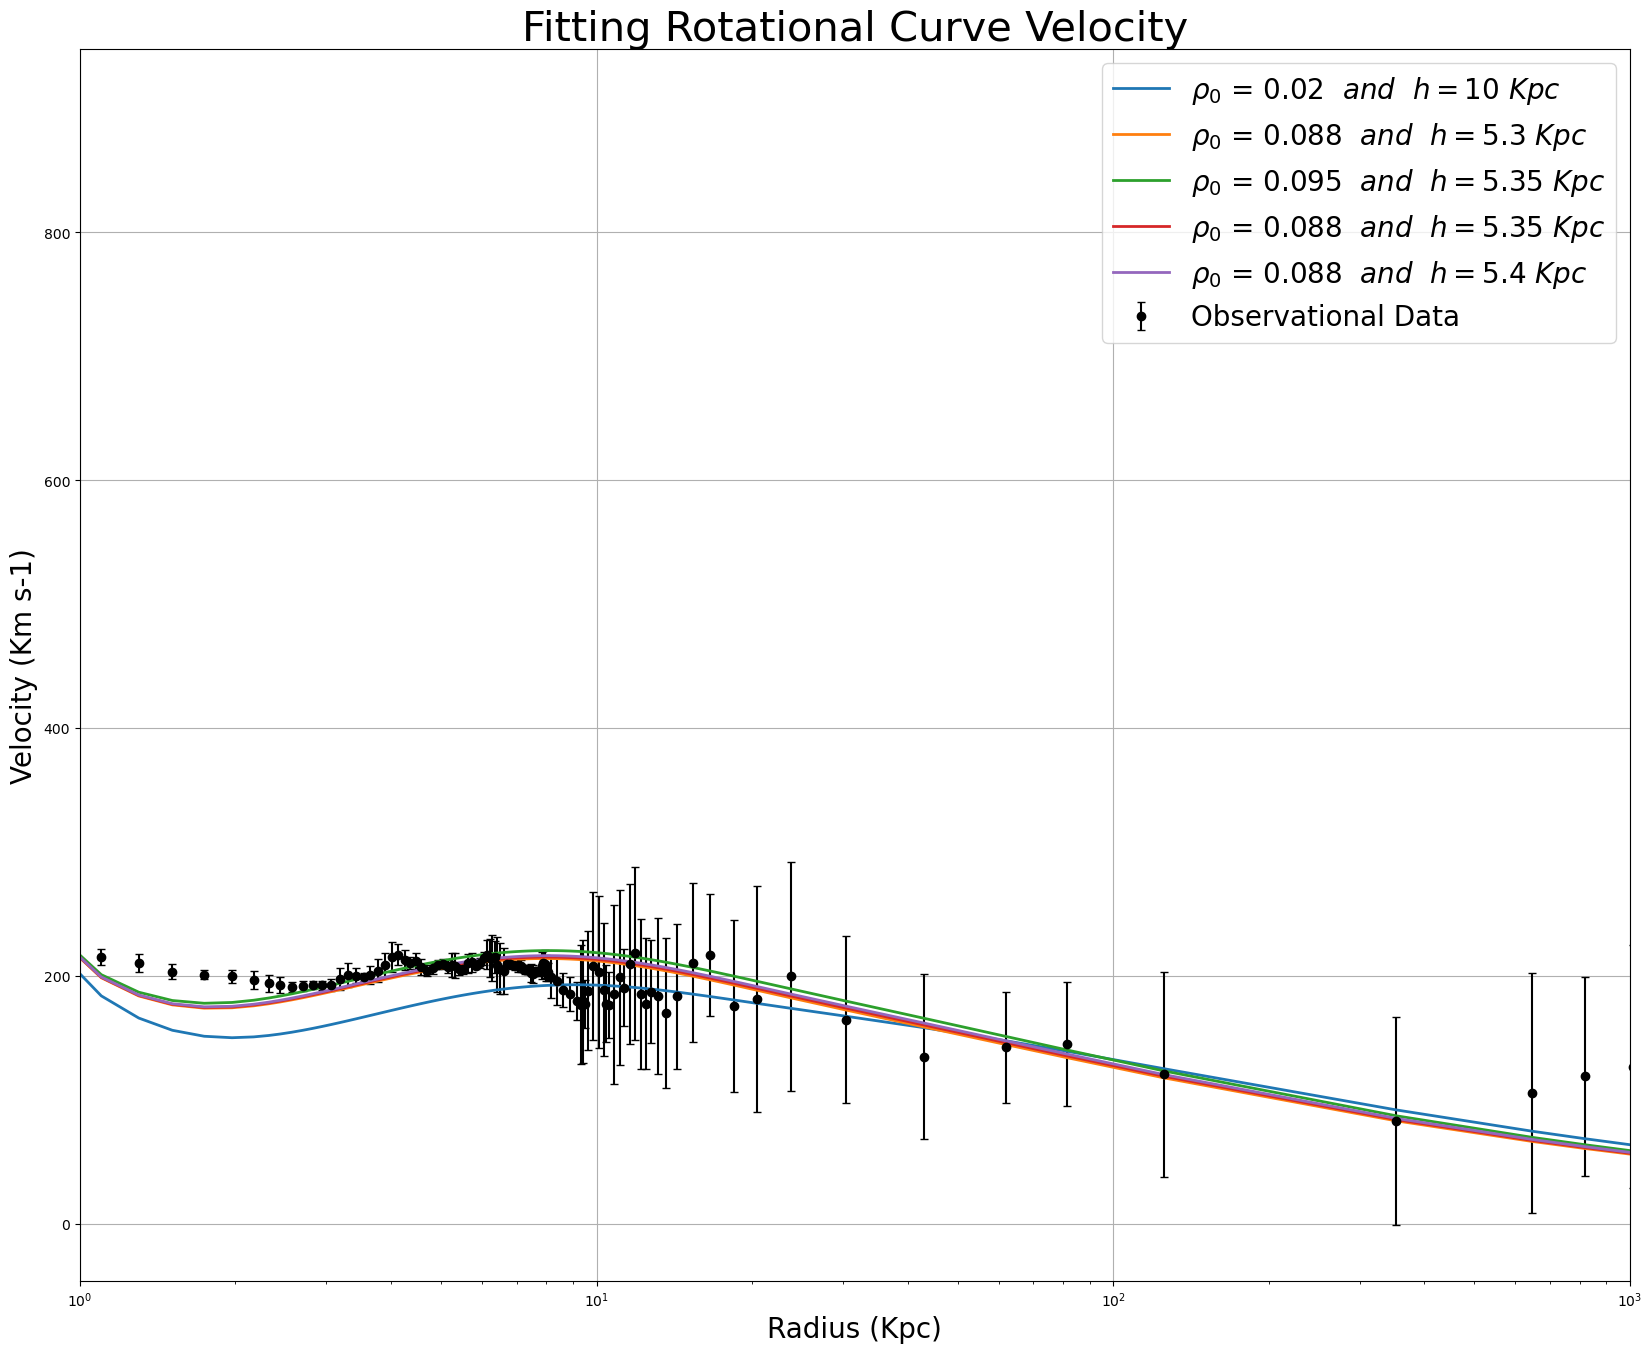

In [8]:
fig = plt.figure(figsize=(20, 16))

plt.errorbar(df['Radius'], df['Velocity'], yerr = df['Velo.dispersion'], fmt = 'o', color = 'black', capsize = 3, label='Observational Data')
plt.plot(df['Radius'], df['V(R)_0.02_10kpc'], linewidth = 2, label = '$\u03C1_0$ = $0.02$  $and$  $h = 10$ $Kpc$')
plt.plot(df['Radius'], df['V(R)_0.088_5.3kpc'], linewidth = 2, label = '$\u03C1_0$ = $0.088$  $and$  $h = 5.3$ $Kpc$')
plt.plot(df['Radius'], df['V(R)_0.095_5.35kpc'], linewidth = 2, label = '$\u03C1_0$ = $0.095$  $and$  $h = 5.35$ $Kpc$')
plt.plot(df['Radius'], df['V(R)_0.088_5.35kpc'], linewidth = 2, label = '$\u03C1_0$ = $0.088$  $and$  $h = 5.35$ $Kpc$')
plt.plot(df['Radius'], df['V(R)_0.088_5.4kpc'], linewidth = 2, label = '$\u03C1_0$ = $0.088$  $and$  $h = 5.4$ $Kpc$')
plt.xlabel('Radius (Kpc)', fontsize = 20)
plt.ylabel('Velocity (Km s-1)', fontsize = 20)
plt.title('Fitting Rotational Curve Velocity', fontsize = 30)
plt.xscale('log')
plt.xlim(1, 10**(3))
plt.legend(prop={'size': 20})
plt.grid(True)
plt.show()

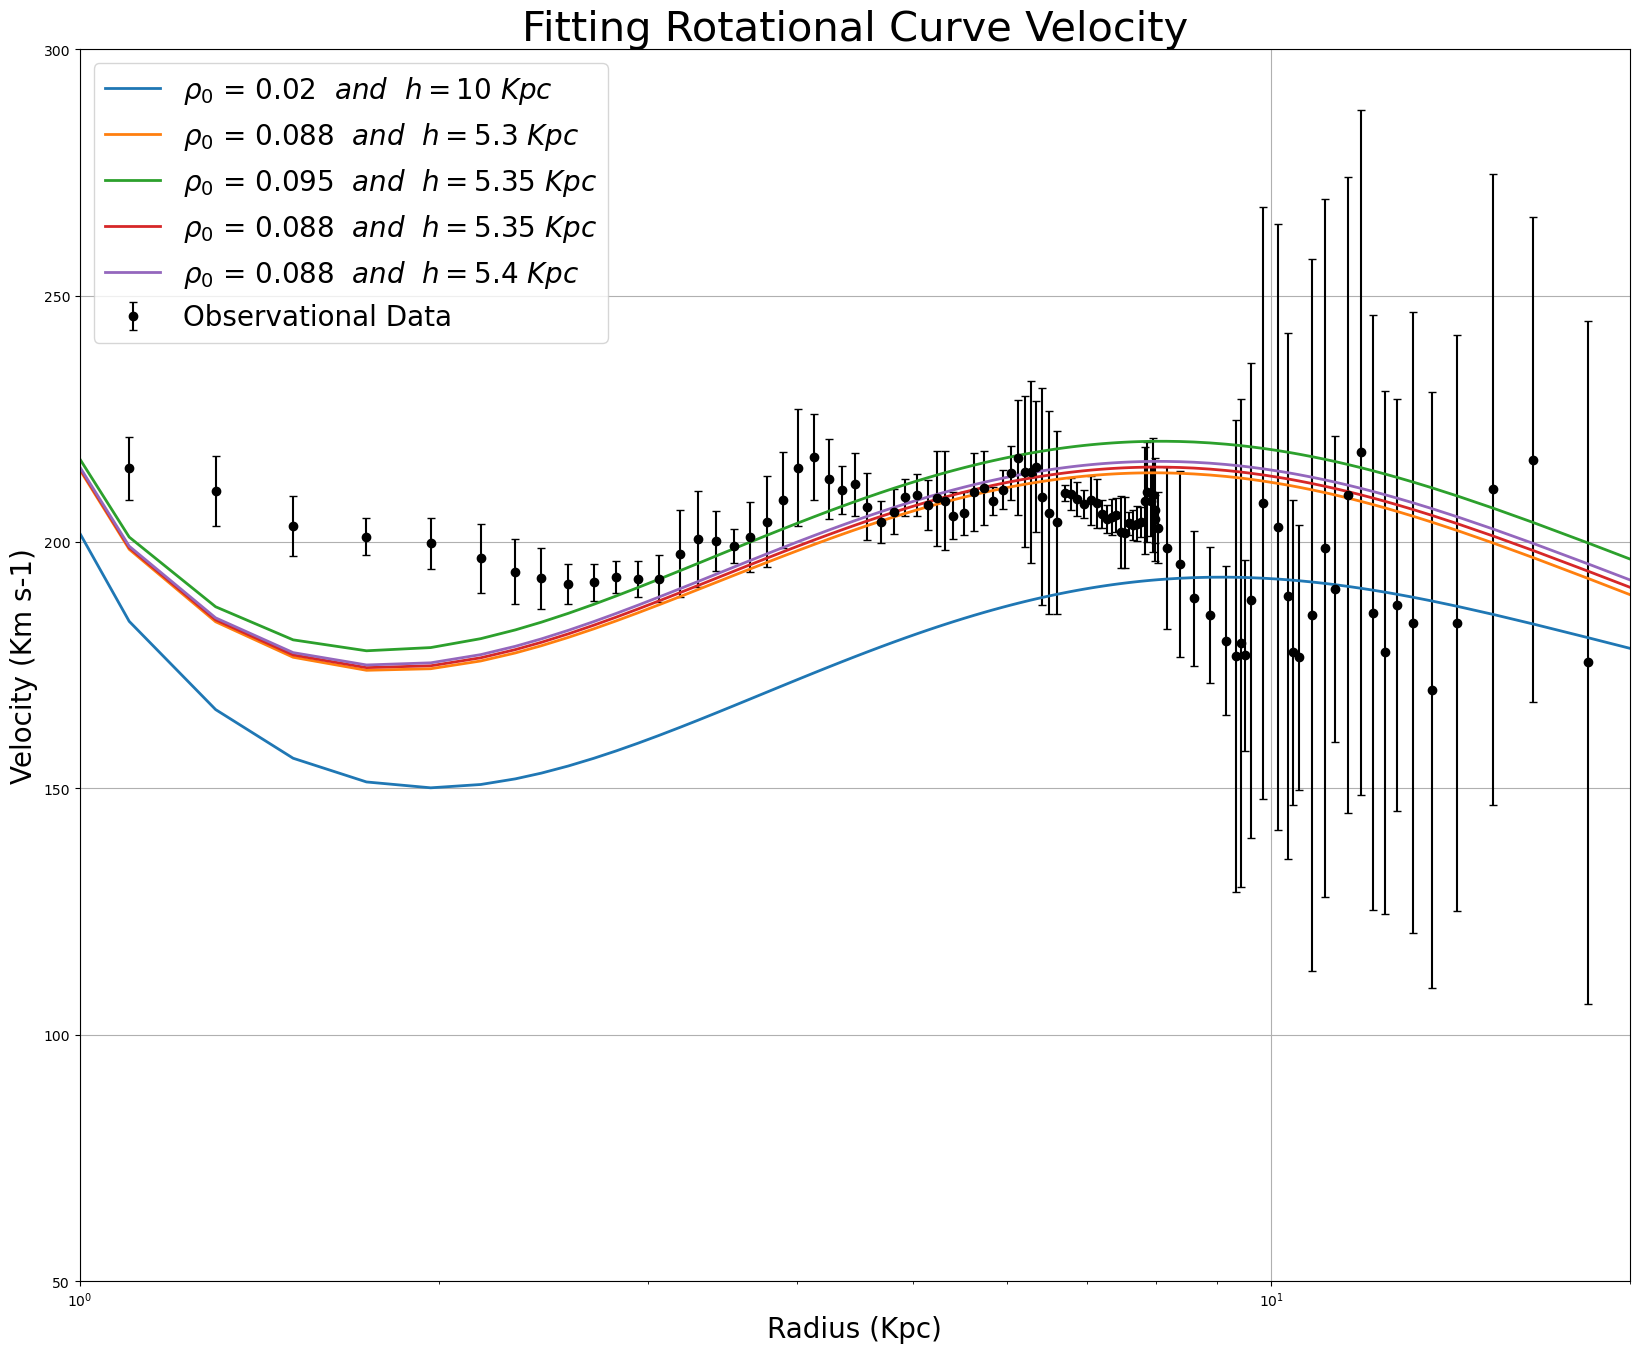

In [9]:
fig = plt.figure(figsize=(20, 16))

plt.errorbar(df['Radius'], df['Velocity'], yerr = df['Velo.dispersion'], fmt = 'o', color = 'black', capsize = 3, label='Observational Data')
plt.plot(df['Radius'], df['V(R)_0.02_10kpc'], linewidth = 2, label = '$\u03C1_0$ = $0.02$  $and$  $h = 10$ $Kpc$')
plt.plot(df['Radius'], df['V(R)_0.088_5.3kpc'], linewidth = 2, label = '$\u03C1_0$ = $0.088$  $and$  $h = 5.3$ $Kpc$')
plt.plot(df['Radius'], df['V(R)_0.095_5.35kpc'], linewidth = 2, label = '$\u03C1_0$ = $0.095$  $and$  $h = 5.35$ $Kpc$')
plt.plot(df['Radius'], df['V(R)_0.088_5.35kpc'], linewidth = 2, label = '$\u03C1_0$ = $0.088$  $and$  $h = 5.35$ $Kpc$')
plt.plot(df['Radius'], df['V(R)_0.088_5.4kpc'], linewidth = 2, label = '$\u03C1_0$ = $0.088$  $and$  $h = 5.4$ $Kpc$')
plt.xlabel('Radius (Kpc)', fontsize = 20)
plt.ylabel('Velocity (Km s-1)', fontsize = 20)
plt.title('Fitting Rotational Curve Velocity', fontsize = 30)
plt.xscale('log')
plt.ylim(50,300)
plt.legend(prop={'size': 20})
plt.xlim(1, 2*10**1)
plt.grid(True)
plt.show()

## 	ρ0 = $0.088$  and  $h = 5.4$ $Kpc$

## Fitting Each Part

In [10]:
df

,Radius,Velocity,Velo.dispersion,Vbulge,Vdiskk,VHalo(Rho0 = 0.02 and h = 10 kpc),VHalo(Rho0 = 0.088 and h = 5.3 kpc),VHalo(Rho0 = 0.095 and h = 5.35 kpc),VHalo(Rho0 = 0.088 and h = 5.35 kpc),VHalo(Rho0 = 0.088 and h = 5.4 kpc),V(R)_0.02_10kpc,V(R)_0.088_5.3kpc,V(R)_0.095_5.35kpc,V(R)_0.088_5.35kpc,V(R)_0.088_5.4kpc
0,0.290,241.68,17.15,NaN,22.701056,38.841574,58.343119,60.924237,58.636715,58.928868,NaN,NaN,NaN,NaN,NaN
1,0.525,242.67,11.06,8.984180e+02,36.407407,51.477554,76.361418,79.758927,76.764219,77.164999,900.627700,902.392033,902.685882,902.426208,902.460388
2,0.820,226.67,12.34,2.247026e+02,50.810740,63.153627,92.311338,96.445417,92.824182,93.334426,238.875177,248.182096,249.749250,248.373304,248.564447
3,1.100,214.93,6.44,1.573117e+02,62.415440,71.900838,103.731770,108.403670,104.333438,104.932061,183.881492,198.501770,200.982656,198.816847,199.131640
4,1.300,210.32,7.12,1.293131e+02,69.728190,77.230704,110.439768,115.432512,111.098368,111.753657,165.977343,183.795645,186.838330,184.192139,184.588127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,353.290,82.83,83.95,9.873821e-05,20.378441,89.535732,80.449825,84.654254,81.475741,82.504720,91.825531,82.990694,87.072519,83.985578,84.984173
109,647.550,105.77,96.74,4.346066e-06,15.050258,73.099690,64.644969,68.037224,65.482631,66.323023,74.632934,66.373807,69.681949,67.189919,68.009218
110,817.710,118.92,80.17,1.140560e-06,13.392822,67.317882,59.232328,62.344597,60.003745,60.777743,68.637198,60.727558,63.766892,61.480217,62.235856
111,1012.540,126.69,98.22,3.116850e-07,12.035398,62.313114,54.599438,57.471388,55.313510,56.030022,63.464754,55.910191,58.718066,56.607731,57.308064


#### Parameter yang cocok secara grafik adalah Rho_0 = 0.088 dan h = 5.4 Kpc

In [11]:
V_bulge = df['Vbulge'].to_numpy()
V_disk = df['Vdiskk'].to_numpy()
V_halo_choose = df['VHalo(Rho0 = 0.088 and h  = 5.4 kpc)'].to_numpy()
V_R_halo_choose = df['V(R)_0.088_5.4kpc'].to_numpy()

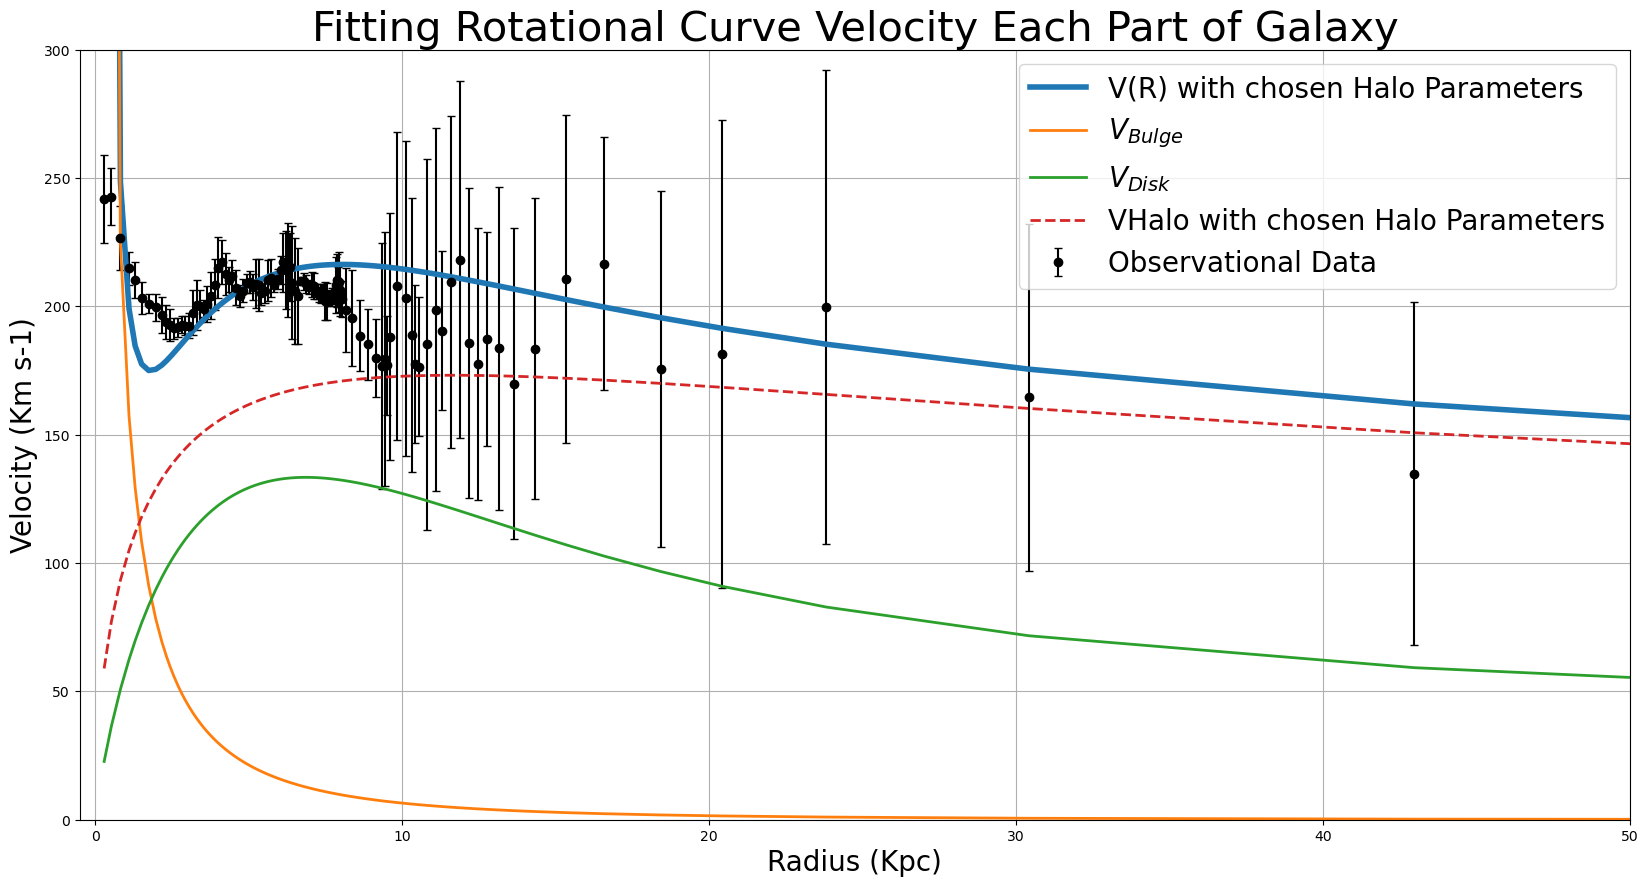

In [12]:
fig = plt.figure(figsize=(20, 10))

plt.errorbar(df['Radius'], df['Velocity'], yerr = df['Velo.dispersion'], fmt = 'o', color = 'black', capsize = 3, label='Observational Data')
plt.plot(df['Radius'], df['V(R)_0.088_5.4kpc'], linewidth = 4, label = 'V(R) with chosen Halo Parameters')
plt.plot(df['Radius'], df['Vbulge'], linewidth = 2, label = '$V_{Bulge}$')
plt.plot(df['Radius'], df['Vdiskk'], linewidth = 2, label = '$V_{Disk}$')
plt.plot(df['Radius'], df['VHalo(Rho0 = 0.088 and h  = 5.4 kpc)'], linewidth = 2, linestyle ='--',label = 'VHalo with chosen Halo Parameters')
plt.xlabel('Radius (Kpc)', fontsize = 20)
plt.ylabel('Velocity (Km s-1)', fontsize = 20)
plt.title('Fitting Rotational Curve Velocity Each Part of Galaxy', fontsize = 30)
plt.xlim(-0.5, 50)
plt.ylim(0,300)
plt.legend(prop={'size': 20})
plt.grid(True)
plt.show()

## Estimate Mass of Dark Matter and Total Mass of Galaxy using Parameter Rho0 and h that fit with Observational Data

In [13]:
# Massa Dark Matter
def Mass(R, rho0, h):
    X = (R)/(h)
    M = 4*np.pi*rho0*((h)**3)*(np.log(1 + X) - (X/(1 + X)))
    return M

R485 = 485*1000
Mass_DM = Mass(R485, 0.088, 5.4*1000)
print('Rho_0 = 0.088 and h = 5.4 Kpc, Mass of Dark Matter =',Mass_DM/1e11, 'x 10^11 Msun')

Rho_0 = 0.088 and h = 5.4 Kpc, Mass of Dark Matter = 6.129089726528622 x 10^11 Msun


In [14]:
# Mass with Eror
import numpy as np

df['Mh(R)_0.088_5.4kpc'] = Mass(df['Radius']*1000, 0.088,5.4*1000)

# hitung nilai galat
Mh_err = np.std(df['Mh(R)_0.088_5.4kpc']) / np.sqrt(len(df['Mh(R)_0.088_5.4kpc'])) # Standard Deviation time 1/sqrt(n)
Mb_err = 0.083*10**(10) # Source from Paper in Msun
Md_err = 0.41*10**(10)  # Source from Paper in Msun
Mtot = Mb + Md + Mass_DM
Mtot_err = np.sqrt(Mb_err**2 + Md_err**2 + Mh_err**2) # Error from  Total Mass


# Mass Total with error
print('Mass of Bulge =', Mb/1e10, '±', Mb_err/1e10,'x 10^10 Msun')
print('Mass of Disk =', Md/1e10, '±', Md_err/1e10,'x 10^10 Msun')
print('Mass of Dark Matter =', Mass_DM/1e11, '±', Mh_err/1e11,'x 10^11 Msun')
print("Total Mass of Galaxy =",Mtot/1e11, '±', Mtot_err/1e11,'x 10^11 Msun')

Mass of Bulge = 1.652 ± 0.083 x 10^10 Msun
Mass of Disk = 3.41 ± 0.41 x 10^10 Msun
Mass of Dark Matter = 6.129089726528622 ± 0.13440568169555941 x 10^11 Msun
Total Mass of Galaxy = 6.6352897265286215 ± 0.14076497175095812 x 10^11 Msun


## Comparing Total Mass From Analysis and Paper
\begin{equation}
M_{total_{pub}} = (7.03±1.01)×10^{10}M_⊙\\\
M_{total_{fit}} = (6.63±0.14)×10^{10}M_⊙\\\
Galat = \left|\frac{M_{total_{fit}} - M_{total_{pub}}}{M_{total_{pub}}}\right| \times 100 \%
\end{equation}

In [15]:
# Membandingkan Massa Galaksi yang diperoleh analisis data dan hasil publikasi jurnal
Mpub = 7.03*10**(11)
Mpub_error = 1.01*10**(11)
Manalyze = Mtot 
Manalyze_error = Mtot_err

print('Massa publikasi =',Mpub/1e11,'x 10^11 Msun')
print('Massa analisis =',Manalyze/1e11, 'x 10^11 Msun')
print('Persentase Galat =',np.abs((Manalyze-Mpub)/(Mpub))*100,'%')

Massa publikasi = 7.03 x 10^11 Msun
Massa analisis = 6.6352897265286215 x 10^11 Msun
Persentase Galat = 5.614655383661141 %
